<a href="https://colab.research.google.com/github/Bizzzzan/5005CMD_project/blob/main/5004CMD_Q1)d)_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

coefficient of determination: 0.6352968891451758
intercept: 56795304.09582394
coefficients: [0.1742214]
predicted response:
[2.19684971e+08 2.30470221e+08 2.33562866e+08 2.45738125e+08
 2.28262792e+08 2.40214522e+08 2.38154125e+08]


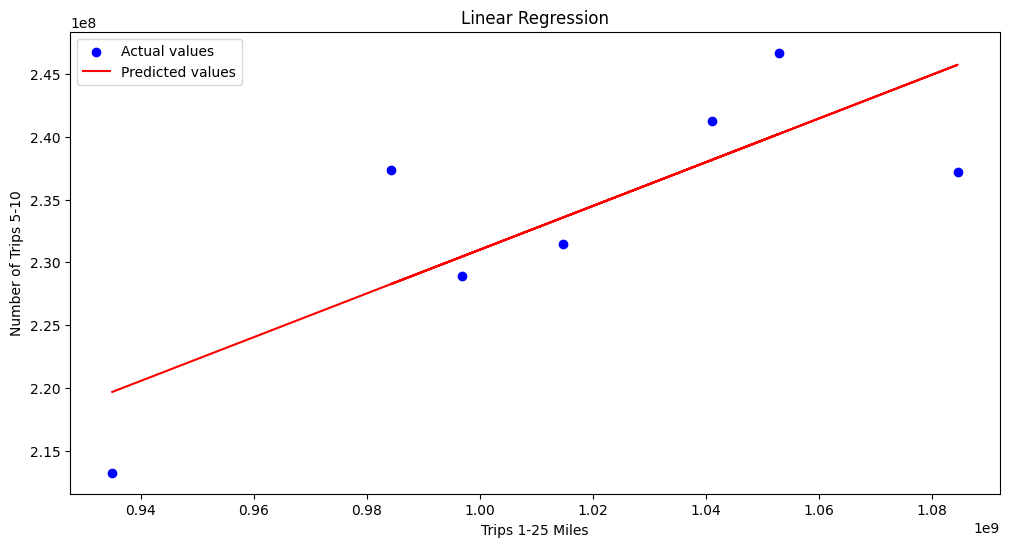

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
import dask.dataframe as dd
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

#define datatypes for each column
dtype={'County Name': 'object',
       'Number of Trips': 'float64',
       'Number of Trips 1-3': 'float64',
       'Number of Trips 10-25': 'float64',
       'Number of Trips 100-250': 'float64',
       'Number of Trips 25-50': 'float64',
       'Number of Trips 250-500': 'float64',
       'Number of Trips 3-5': 'float64',
       'Number of Trips 5-10': 'float64',
       'Number of Trips 50-100': 'float64',
       'Number of Trips <1': 'float64',
       'Number of Trips >=500': 'float64',
       'Population Not Staying at Home': 'float64',
       'Population Staying at Home': 'float64',
       'State Postal Code': 'object'}

#read datasets
df = pd.read_csv("/content/Trips_by_Distance (1).csv", dtype=dtype)
df_full = pd.read_csv("/content/Trips_Full Data (2).csv")

x=df_full.loc[:, "Trips 1-25 Miles"] #read selected column
x=np.array(x).reshape((-1, 1))

#convert date datatype to datetime
df['Date'] = pd.to_datetime(df['Date'])

#filter columns
df = df[(df['Week'] == 32) & (df['Level'] == 'National') & (df['Date'].dt.year == 2019)]
y=df.loc[:, "Number of Trips 5-10"] #read selected column

#linear regression model
model = LinearRegression()
model.fit(x, y)

#get results
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"coefficients: {model.coef_}")

#model to predict the response
y_pred = model.predict(x)
print(f"predicted response:\n{y_pred}")

#plot scatter graph
plt.figure(figsize=(12, 6))
plt.scatter(x, y, color='blue', label='Actual values')
plt.plot(x, y_pred, color='red', label='Predicted values')
plt.xlabel('Trips 1-25 Miles')
plt.ylabel('Number of Trips 5-10')
plt.title('Linear Regression')
plt.legend()
plt.show()



coefficient of determination: 0.7934627895674242
intercept: -1729985091.952814
coefficients: [ 3.72010692e+00 -1.75555579e-09]
predicted response:
[2.13545684e+08 2.33893205e+08 2.37245446e+08 2.39691189e+08
 2.30823810e+08 2.40706642e+08 2.40181647e+08]


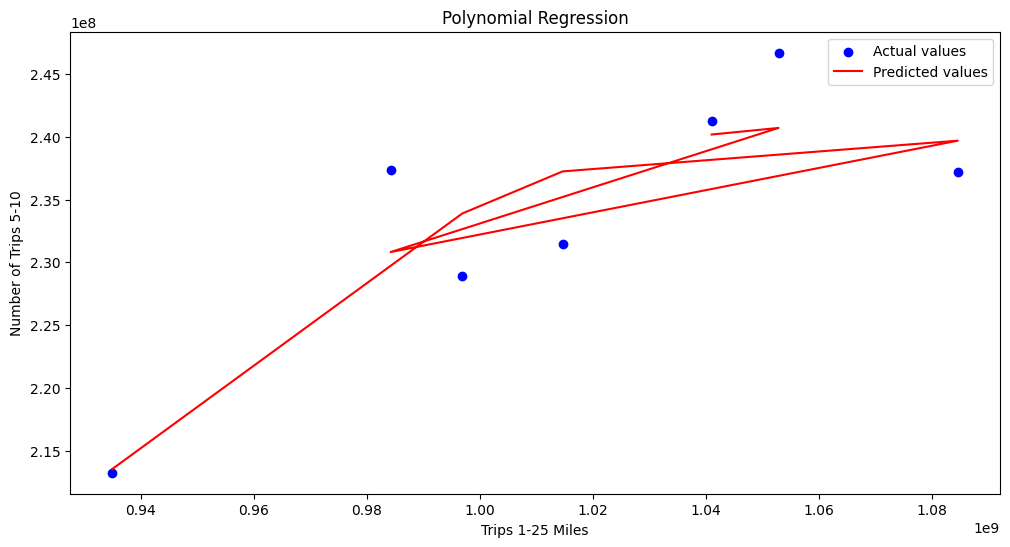

In [ ]:
#polynomial regression model
x_poly = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x)
model = LinearRegression().fit(x_poly, y)

#get results
r_sq = model.score(x_poly, y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"coefficients: {model.coef_}")

#predict response
y_pred = model.predict(x_poly)
print(f"predicted response:\n{y_pred}")

#plot scatter graph
plt.figure(figsize=(12, 6))
plt.scatter(x, y, color='blue', label='Actual values')
plt.plot(x, y_pred, color='red', label='Predicted values')
plt.xlabel('Trips 1-25 Miles')
plt.ylabel('Number of Trips 5-10')
plt.title('Polynomial Regression')
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


                             OLS Regression Results                             
Dep. Variable:     Number of Trips 5-10   R-squared:                       0.635
Model:                              OLS   Adj. R-squared:                  0.562
Method:                   Least Squares   F-statistic:                     8.710
Date:                  Fri, 18 Apr 2025   Prob (F-statistic):             0.0318
Time:                          02:44:57   Log-Likelihood:                -119.22
No. Observations:                     7   AIC:                             242.4
Df Residuals:                         5   BIC:                             242.3
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        5.68e+07      6e+07

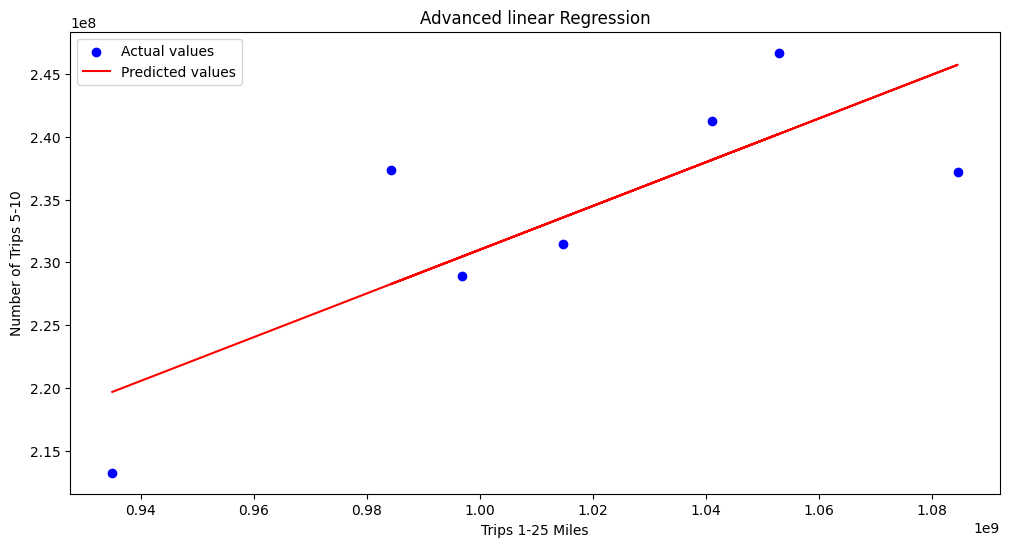

In [ ]:
#advanced linear regression with statsmodels
x = sm.add_constant(x)
results = sm.OLS(y, x).fit()
print(results.summary())
print(f"coefficient of determination: {results.rsquared}")
print(f"adjusted coefficient of determination: {results.rsquared_adj}")
print(f"regression coefficients: {results.params}")
print(f"predicted response:\n{results.fittedvalues}")
print(f"predicted response:\n{results.predict(x)}")

#predict response
y_pred = results.predict(x)

#plot scatter graph
plt.figure(figsize=(12, 6))
plt.scatter(x[:, 1], y, color='blue', label='Actual values')
plt.plot(x[:, 1], y_pred, color='red', label='Predicted values')
plt.xlabel('Trips 1-25 Miles')
plt.ylabel('Number of Trips 5-10')
plt.title('Advanced linear Regression')
plt.legend()
plt.show()

x train
 [[1052793819]
 [ 984193010]
 [1040967509]
 [ 934957837]
 [1014614495]]
y train
 227    246696054.0
226    237319382.0
228    241273476.0
222    213249600.0
224    231439269.0
Name: Number of Trips 5-10, dtype: float64
x test
 [[1084498325]
 [ 996863262]]
y test
 225    237225197.0
223    228884645.0
Name: Number of Trips 5-10, dtype: float64
predict [2.44587680e+08 2.36151955e+08]


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


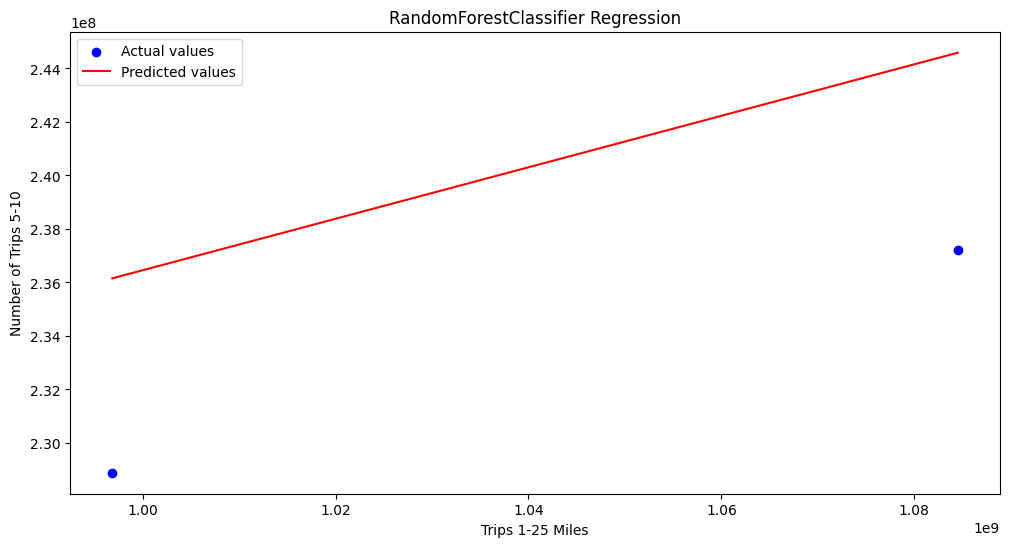

In [2]:
#split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, shuffle=True)
print("x train\n", x_train)
print("y train\n", y_train)
print("x test\n", x_test)
print("y test\n", y_test)

#RandomForestRegressor model
model = RandomForestRegressor(verbose=1)
model.fit(x_train, y_train)

#predict response
y_pred = model.predict(x_test)
print("predict", y_pred)

#plot scatter graph
plt.figure(figsize=(12, 6))
plt.scatter(x_test, y_test, color='blue', label='Actual values')
plt.plot(x_test, y_pred, color='red', label='Predicted values')
plt.xlabel('Trips 1-25 Miles')
plt.ylabel('Number of Trips 5-10')
plt.title('RandomForestClassifier Regression')
plt.legend()
plt.show()
